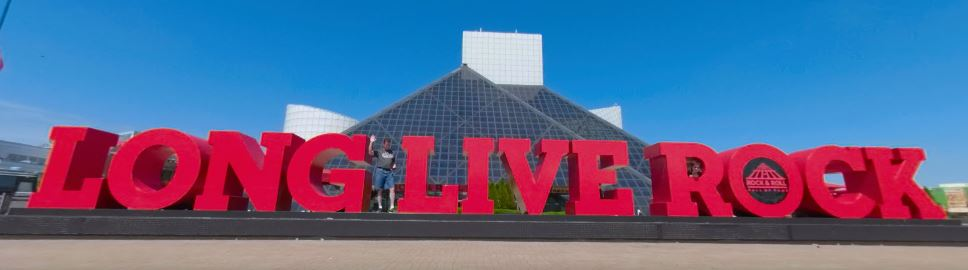



# A comparison of song characteristics
### Analyses utilizing radar plots to compare trend movements in song characteristics for a selection of today's top genres



### **Dependencies**

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show, grid, tight_layout
from sklearn import preprocessing
from math import pi
import matplotlib.patches as mpl_patches

### Import data set and get a sense of data structure
#### Clean up artist strings by removing [ ] and ' ' for easier filtering

In [2]:
path = '../cleaned_data/cleaned_data.csv'
df_data = pd.read_csv(path)
df_data.dropna(axis=0, how = 'any', inplace = True)
df_data['artists'] = df_data['artists'].astype('string')
df_data['artists'] = df_data['artists'].str.strip('[]')
df_data['artists'] = df_data['artists'].str.strip("'")
df_data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year
0,0.991000,Mamie Smith,0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,0.0936,149.976,0.6340,1920
1,0.643000,"""Screamin' Jay Hawkins""",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,0.0534,86.889,0.9500,1920
2,0.993000,Mamie Smith,0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,0.1740,97.600,0.6890,1920
3,0.000173,Oscar Velazquez,0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,0.0425,127.997,0.0422,1920
4,0.295000,Mixe,0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,0.0768,122.076,0.2990,1920


# Individual Artist Top 20 Song Attributes -- Selected Artists
1. Eminem
2. Taylor Swift
3. Blake Shelton
4. Avicii
5. Metallica

### Filter the data set for the artists in the study
#### Drop columns that are not of interest for the analysis
#### Sort the new data frame by artist and popularity

In [3]:
artists_filter = ['Eminem', 'Taylor Swift', 'Blake Shelton', 'Avicii', 'Metallica']
filt = df_data['artists'].isin(artists_filter)
df = df_data.loc[filt]
df = df.drop(columns = ['id', 'mode', 'key', 'mode', 'name', 'year'])
df.sort_values(by = ['artists', 'popularity'], ascending = (True, False), inplace = True)
df

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence
18486,0.00380,Avicii,0.532,247427,0.783,0,0.001200,0.1610,-5.697,84,0.0523,124.080,0.643
18730,0.01660,Avicii,0.527,176658,0.835,0,0.000000,0.2490,-5.298,82,0.0433,125.983,0.654
38338,0.31000,Avicii,0.579,230613,0.736,0,0.000000,0.1980,-3.863,79,0.0527,127.999,0.613
18646,0.03090,Avicii,0.545,255093,0.780,0,0.000046,0.0828,-4.867,76,0.0436,125.014,0.458
37518,0.04620,Avicii,0.584,199907,0.889,0,0.828000,0.3090,-5.941,76,0.0343,126.040,0.464
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140625,0.06060,Taylor Swift,0.601,200560,0.852,0,0.000003,0.3700,-3.096,46,0.0386,100.015,0.513
140629,0.36700,Taylor Swift,0.610,261453,0.531,0,0.000000,0.3510,-6.123,46,0.0239,85.979,0.228
140679,0.61100,Taylor Swift,0.664,245347,0.447,0,0.000001,0.1390,-8.535,46,0.0292,126.079,0.364
172175,0.00727,Taylor Swift,0.695,230333,0.723,0,0.000001,0.1000,-3.806,46,0.0285,121.011,0.679


### Normalize duration, tempo and loudness to make plotting easier

In [4]:
df_norm = df[['artists','acousticness', 'danceability', 'duration_ms', 'energy',
       'explicit', 'instrumentalness', 'liveness', 'loudness', 'popularity',
       'speechiness', 'tempo', 'valence']]

categories = ['duration_ms', 'tempo', 'loudness']

for category in categories:
    df_norm[category] = [abs((x - df[category].max())/(df[category].max() - df[category].min()))
                        for x in df[category]]

### Filter the data set for the top 20 songs by popularity

In [5]:
for artist in artists_filter:
    filt = df_norm['artists']== artist
    df_norm[filt] = df_norm[filt].head(20)
    df_norm.dropna(how = 'any', inplace = True)

df_norm.drop(columns = 'popularity', inplace = True)

df_norm['artists'].value_counts()

Blake Shelton    20
Eminem           20
Taylor Swift     20
Metallica        20
Avicii           17
Name: artists, dtype: Int64

### Group the data set by artist and get a sense of min, max and mean values by song characterstic

In [6]:
df_gb = df_norm.groupby('artists')
df_gb.min()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,speechiness,tempo,valence
artists,,,,,,,,,,,
Avicii,0.002470,0.524,0.521091,0.626,0.0,0.000000,0.0828,0.144609,0.0321,0.538466,0.3030
Blake Shelton,0.001670,0.412,0.655745,0.457,0.0,0.000000,0.0620,0.144762,0.0231,0.000000,0.2020
Eminem,0.001700,0.637,0.436577,0.651,1.0,0.000000,0.0426,0.064603,0.0572,0.237604,0.0612
Metallica,0.000005,0.256,0.244622,0.364,0.0,0.000005,0.0424,0.059085,0.0258,0.392753,0.1700
Taylor Swift,0.009290,0.316,0.558241,0.240,0.0,0.000000,0.0637,0.171124,0.0264,0.237986,0.1720


In [7]:
df_gb.max()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,speechiness,tempo,valence
artists,,,,,,,,,,,
Avicii,0.3100,0.605,0.819424,0.889,0.0,0.88700,0.387,0.272780,0.0579,0.566217,0.836
Blake Shelton,0.4090,0.787,0.858559,0.934,0.0,0.01870,0.405,0.369300,0.0643,0.908463,0.964
Eminem,0.5290,0.949,0.746404,0.954,1.0,0.00757,0.799,0.350333,0.3860,0.844434,0.870
Metallica,0.0505,0.674,0.675479,0.986,0.0,0.53100,0.420,0.450379,0.2770,0.808352,0.682
Taylor Swift,0.9200,0.777,0.783443,0.741,1.0,0.17900,0.250,0.481761,0.2450,0.952168,0.920


In [8]:
df_gb.mean()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,speechiness,tempo,valence
artists,,,,,,,,,,,
Avicii,0.048693,0.558235,0.684318,0.790529,0.00,0.105155,0.201518,0.204000,0.048035,0.555350,0.576706
Blake Shelton,0.125238,0.583550,0.723027,0.728100,0.00,0.000942,0.171690,0.242034,0.034860,0.537655,0.572900
Eminem,0.129362,0.793900,0.607154,0.779250,1.00,0.000400,0.259885,0.182324,0.216430,0.605180,0.569460
Metallica,0.005883,0.486000,0.470489,0.830450,0.00,0.074662,0.131415,0.280571,0.061540,0.595813,0.410900
Taylor Swift,0.656600,0.557400,0.691922,0.535150,0.35,0.017471,0.115625,0.352560,0.066080,0.638513,0.447150


### Plot histograms by artist and charactersitic to understand spread in data

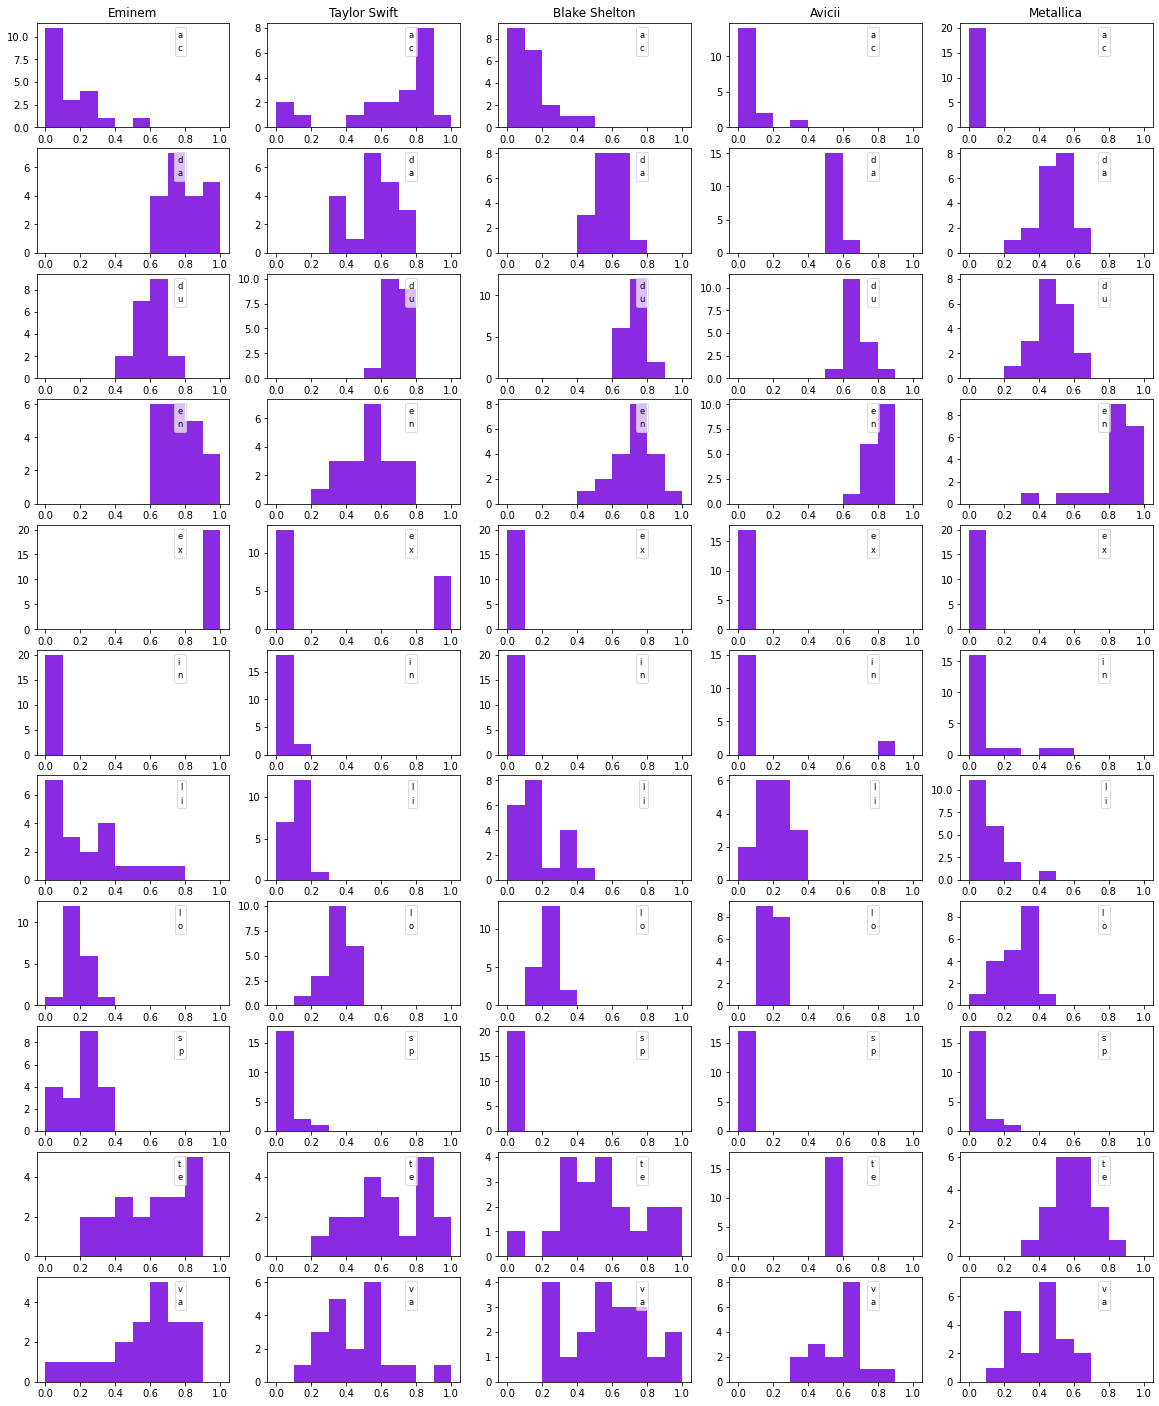

In [9]:
categories = ['acousticness', 'danceability', 'duration_ms', 'energy',
       'explicit', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence']

fig, ax = plt.subplots(11, 5, figsize = (20, 25))

for index_a, artist in enumerate(artists_filter):
    
    for index_c, category in enumerate(categories):

        filt = df_norm['artists'] == artist
        ax[index_c,index_a].hist(df_norm.loc[filt,category], range = (0,1), histtype='bar',
                                 align='mid', orientation='vertical', color= 'blueviolet', label=category)
        ax[0,index_a].set_title(artist)
        
        label = category
        handles = [mpl_patches.Rectangle((0, 0), 15, 5, fc="white", ec="white", lw=0, alpha=0)] * 2
        ax[index_c,index_a].legend(handles, label, loc='upper right', bbox_to_anchor=(0.8, 1.0), fontsize='small',
                                   fancybox=True, framealpha=0.7, 
          handlelength=0, handletextpad=0)
fig.savefig('../images/histograms.png', bbox_inches='tight')

### Assign grouped data set mean values to new dataframe for plotting

In [10]:
df_means = df_gb.mean()

### Capitalize the characterstics for the radar charts

In [11]:
radar_categories = []
for word in categories:
    capital = word[0].upper()
    word = capital + word[1:]
    radar_categories.append(word)

### Eminem radar plot

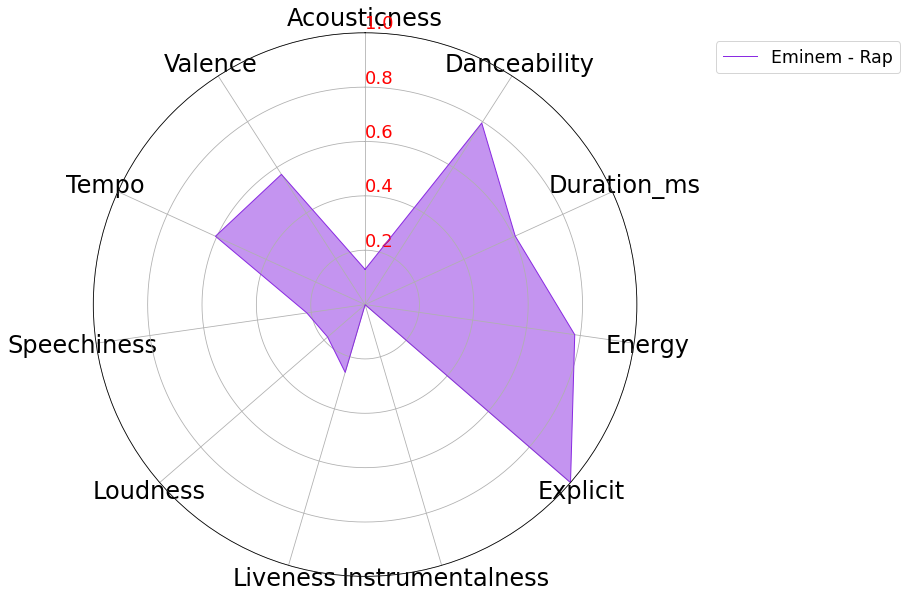

In [12]:
num = len(radar_categories)

angles = [n / float(num) * 2 * pi for n in range(num)]
angles += angles[:1] # the list repeats itself twice without the slice

# Initialise the spider plot

fig = plt.figure(figsize = (10,10))
ax = plt.subplot(111, polar=True)

# First axis on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels labels
plt.xticks(angles[:-1], radar_categories, size = 24)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.2,0.4,0.6, 0.8, 1.0], ["0.2","0.4","0.6", "0.8", "1.0"], color="red", size=18)
plt.ylim(0,1)

# colors
colors = 'blueviolet'

# label
artists = 'Eminem'
label = 'Eminem - Rap'

values = df_means.loc['Eminem',:].tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label = label, color = colors)
ax.fill(angles, values, colors, alpha=0.5)
ax.legend(loc = 'best', bbox_to_anchor = (1.5, 1.0), fontsize = 'xx-large', markerscale = 2.0)
plt.show()
fig.savefig('../images/radar_'+ artists + '.png', bbox_inches='tight')

### Taylor Swift radar plot

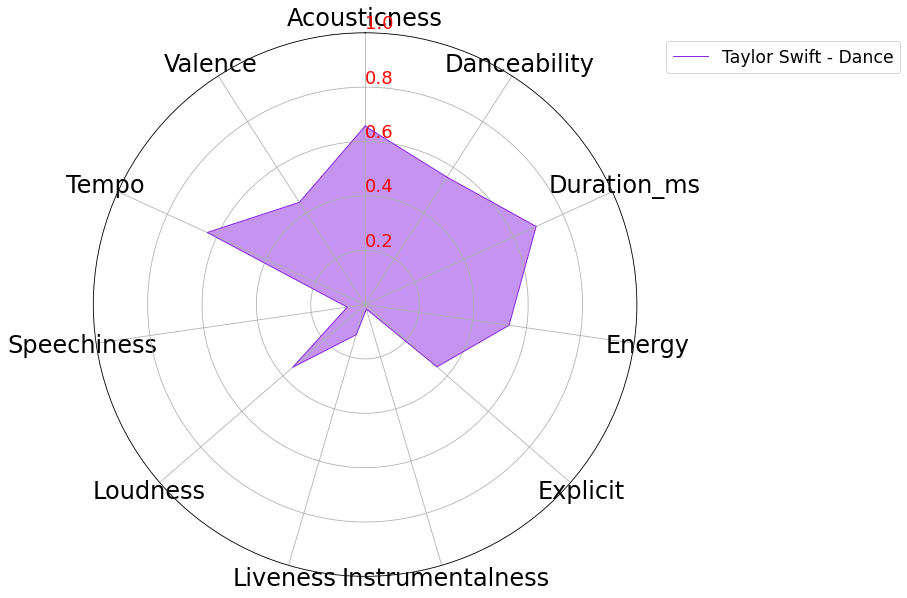

In [13]:
num = len(radar_categories)

angles = [n / float(num) * 2 * pi for n in range(num)]
angles += angles[:1] # the list repeats itself twice without the slice

# Initialise the spider plot

fig = plt.figure(figsize = (10,10))
ax = plt.subplot(111, polar=True)

# First axis on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels labels
plt.xticks(angles[:-1], radar_categories, size = 24)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.2,0.4,0.6, 0.8, 1.0], ["0.2","0.4","0.6", "0.8", "1.0"], color="red", size=18)
plt.ylim(0,1)

# colors
colors = 'blueviolet'
label = 'Taylor Swift - Dance'

# Artists
artists = 'Taylor_Swift'

values = df_means.loc['Taylor Swift',:].tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label = label, color = colors)
ax.fill(angles, values, colors, alpha=0.5)
ax.legend(loc = 'best', bbox_to_anchor = (1.5, 1.0), fontsize = 'xx-large', markerscale = 2.0)
plt.show()
fig.savefig('../images/radar_'+ artists + '.png', bbox_inches='tight')

### Blake Shelton radar plot

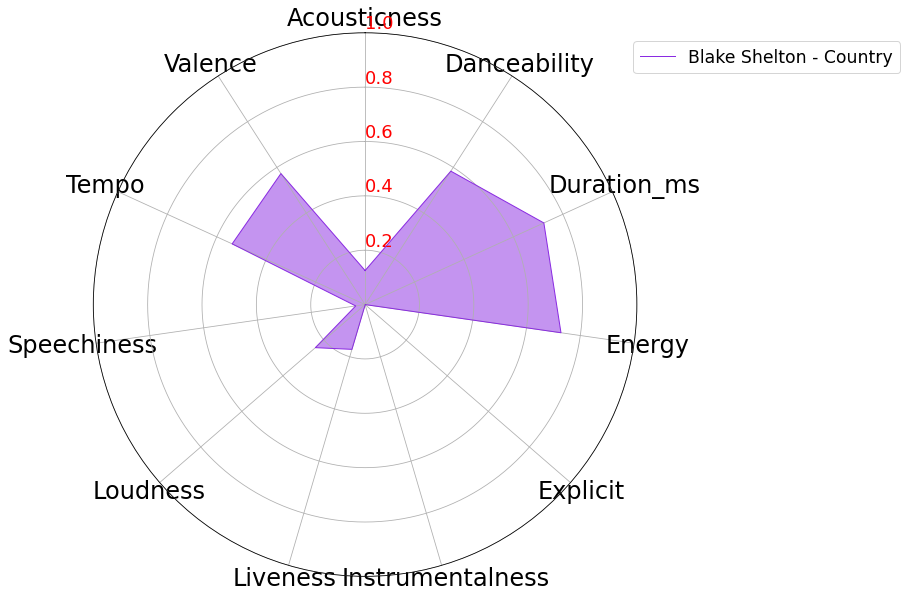

In [14]:
num = len(radar_categories)

angles = [n / float(num) * 2 * pi for n in range(num)]
angles += angles[:1] # the list repeats itself twice without the slice

# Initialise the spider plot

fig = plt.figure(figsize = (10,10))
ax = plt.subplot(111, polar=True)

# First axis on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels labels
plt.xticks(angles[:-1], radar_categories, size = 24)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.2,0.4,0.6, 0.8, 1.0], ["0.2","0.4","0.6", "0.8", "1.0"], color="red", size=18)
plt.ylim(0,1)

# colors
colors = 'blueviolet'
label = 'Blake Shelton - Country'

# Artists
artists = 'Blake_Shelton'

values = df_means.loc['Blake Shelton',:].tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label = label, color = colors)
ax.fill(angles, values, colors, alpha=0.5)
ax.legend(loc = 'best', bbox_to_anchor = (1.5, 1.0), fontsize = 'xx-large', markerscale = 2.0)
plt.show()
fig.savefig('../images/radar_'+ artists + '.png', bbox_inches='tight')

### Avicii radar plot

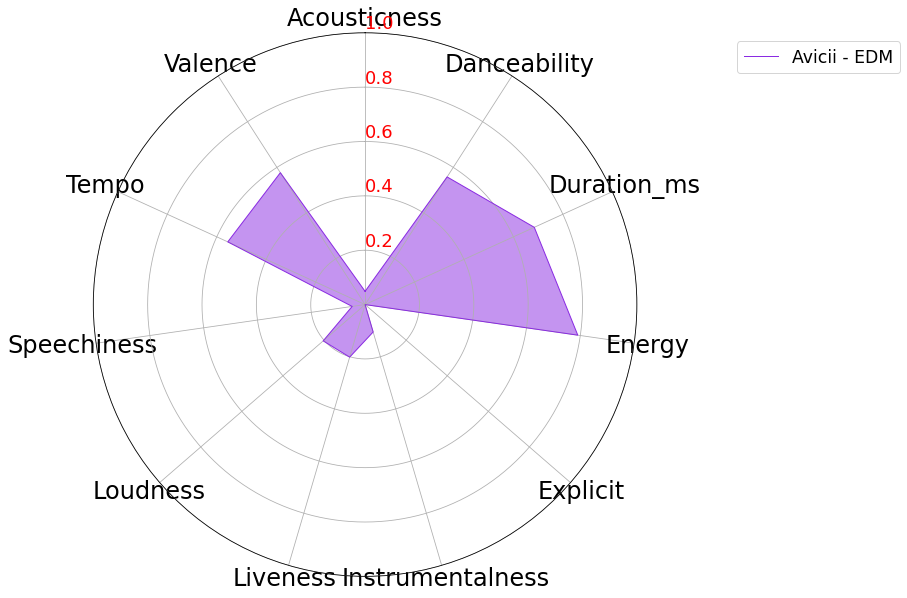

In [15]:
num = len(radar_categories)

angles = [n / float(num) * 2 * pi for n in range(num)]
angles += angles[:1] # the list repeats itself twice without the slice

# Initialise the spider plot

fig = plt.figure(figsize = (10,10))
ax = plt.subplot(111, polar=True)

# First axis on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels labels
plt.xticks(angles[:-1], radar_categories, size = 24)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.2,0.4,0.6, 0.8, 1.0], ["0.2","0.4","0.6", "0.8", "1.0"], color="red", size=18)
plt.ylim(0,1)

# colors
colors = 'blueviolet'
label = 'Avicii - EDM'

# Artists
artists = 'Avicii'

values = df_means.loc['Avicii',:].tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label = label, color = colors)
ax.fill(angles, values, colors, alpha=0.5)
ax.legend(loc = 'best', bbox_to_anchor = (1.5, 1.0), fontsize = 'xx-large', markerscale = 2.0)
plt.show()
fig.savefig('../images/radar_'+ artists + '.png', bbox_inches='tight')

### Metallica radar plot

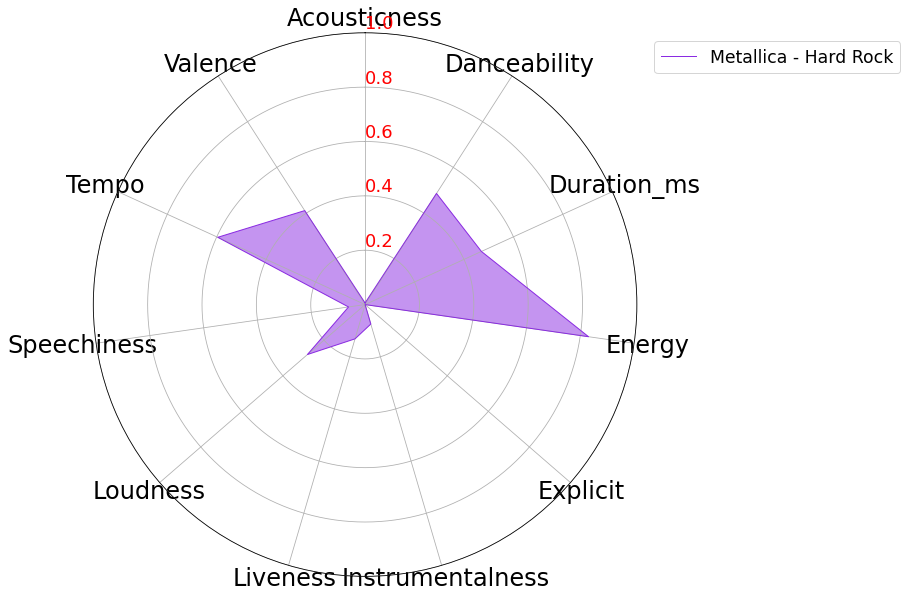

In [16]:
num = len(radar_categories)

angles = [n / float(num) * 2 * pi for n in range(num)]
angles += angles[:1] # the list repeats itself twice without the slice

# Initialise the spider plot

fig = plt.figure(figsize = (10,10))
ax = plt.subplot(111, polar=True)

# First axis on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels labels
plt.xticks(angles[:-1], radar_categories, size = 24)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.2,0.4,0.6, 0.8, 1.0], ["0.2","0.4","0.6", "0.8", "1.0"], color="red", size=18)
plt.ylim(0,1)

# colors
colors = 'blueviolet'
label = 'Metallica - Hard Rock'

# Artists
artists = 'Metallica'

values = df_means.loc['Metallica',:].tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label = label, color = colors)
ax.fill(angles, values, colors, alpha=0.5)
ax.legend(loc = 'best', bbox_to_anchor = (1.5, 1.0), fontsize = 'xx-large', markerscale = 2.0)
plt.show()
fig.savefig('../images/radar_'+ artists + '.png', bbox_inches='tight')

## Top 20 Song Attribute Comparison


### Generate one radar plot with artist characteristics

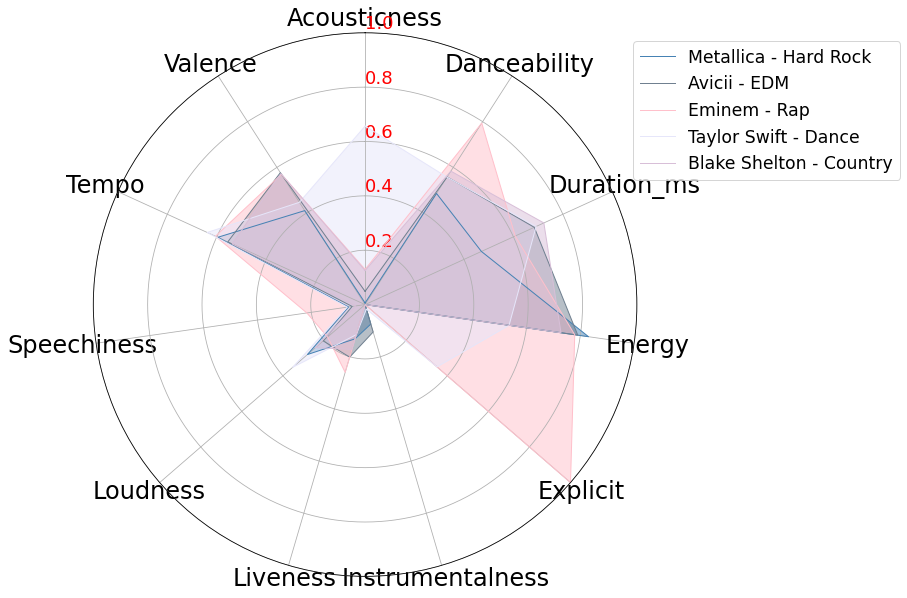

In [17]:
num = len(categories)

angles = [n / float(num) * 2 * pi for n in range(num)]
angles += angles[:1] # the list repeats itself twice without the slice

# Initialise the spider plot

fig = plt.figure(figsize = (10,10))
ax = plt.subplot(111, polar=True)

# First axis on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels labels
plt.xticks(angles[:-1], radar_categories, size = 24)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.2,0.4,0.6, 0.8, 1.0], ["0.2","0.4","0.6", "0.8", "1.0"], color="red", size=18)
plt.ylim(0,1)

# colors
colors = ['steelblue', 'slategray', 'pink', 'lavender', 'thistle']

# Artists
labels = ['Metallica - Hard Rock', 'Avicii - EDM', 'Eminem - Rap', 'Taylor Swift - Dance', 'Blake Shelton - Country']
artists = ['Metallica', 'Avicii', 'Eminem', 'Taylor_Swift', 'Blake_Shelton']
cols = ['Metallica', 'Avicii', 'Eminem', 'Taylor Swift', 'Blake Shelton']

for index in range(len(df_means.index.values)):
    values = df_means.loc[cols[index],:].tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label = labels[index], color = colors[index])
    ax.fill(angles, values, colors[index], alpha=0.5)
    ax.legend(loc = 'best', bbox_to_anchor = (1.5, 1.0), fontsize = 'xx-large', markerscale = 2.0)

plt.show()
fig.savefig('../images/radar_all_artists.png', bbox_inches='tight')